In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib  inline

In [2]:
img=cv2.imread('./test_image/Shahrukhkhan.jpg')
img.shape

(266, 190, 3)

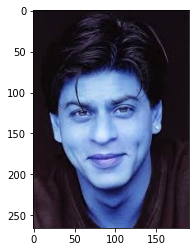

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(266, 190)

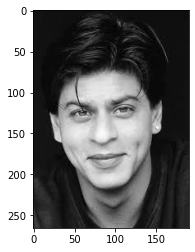

In [5]:
plt.imshow(gray,cmap='gray')

In [6]:
face_cascade=cv2.CascadeClassifier('./OpenCv/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./OpenCv/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)

In [7]:
faces

array([[ 20,  74, 134, 134]], dtype=int32)

In [8]:
(x,y,w,h)=faces[0]
x,y,w,h

(20, 74, 134, 134)

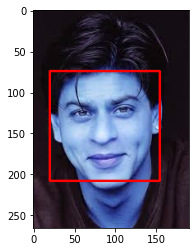

In [9]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

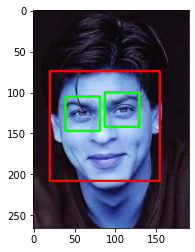

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

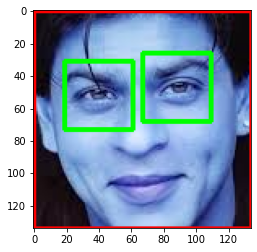

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

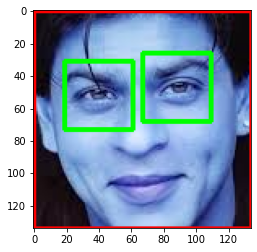

In [12]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
        

In [14]:
cropped_image=get_cropped_image_if_2_eyes('./test_image/Shahrukhkhan.jpg')
cropped_image

array([[[14, 11, 13],
        [15, 12, 14],
        [15, 12, 14],
        ...,
        [12,  9, 11],
        [13, 10, 12],
        [13, 10, 12]],

       [[14, 11, 13],
        [15, 12, 14],
        [15, 12, 14],
        ...,
        [12,  9, 11],
        [13, 10, 12],
        [13, 10, 12]],

       [[14, 11, 13],
        [15, 12, 14],
        [15, 12, 14],
        ...,
        [12,  9, 11],
        [13, 10, 12],
        [13, 10, 12]],

       ...,

       [[36, 23, 31],
        [36, 23, 31],
        [35, 22, 30],
        ...,
        [22, 15, 18],
        [25, 16, 19],
        [25, 16, 19]],

       [[37, 24, 32],
        [36, 23, 31],
        [34, 21, 29],
        ...,
        [22, 15, 18],
        [24, 15, 18],
        [26, 17, 20]],

       [[37, 24, 32],
        [37, 24, 32],
        [34, 21, 29],
        ...,
        [24, 14, 20],
        [24, 14, 20],
        [26, 16, 22]]], dtype=uint8)

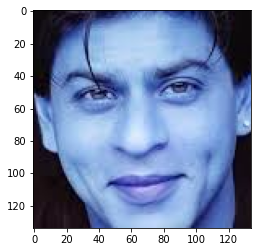

In [15]:
plt.imshow(cropped_image)

In [16]:
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped/"

In [21]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./datasets/amitabh bachchan',
 './datasets/rajinikanth',
 './datasets/shahrukh khan',
 './datasets/vijay',
 './datasets/vijay sethupathi']

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)


In [24]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[] 
        
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder :",cropped_folder)
            
            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path=cropped_folder+"/"+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

amitabh bachchan
generating cropped images in folder : ./datasets/cropped/amitabh bachchan
rajinikanth
generating cropped images in folder : ./datasets/cropped/rajinikanth
shahrukh khan
generating cropped images in folder : ./datasets/cropped/shahrukh khan
vijay
generating cropped images in folder : ./datasets/cropped/vijay
vijay sethupathi
generating cropped images in folder : ./datasets/cropped/vijay sethupathi


In [25]:
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

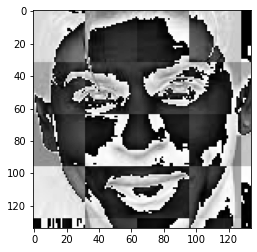

In [26]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [27]:
celebrity_file_names_dict


{'amitabh bachchan': ['./datasets/cropped/amitabh bachchan/amitabh bachchan1.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan2.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan3.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan4.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan5.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan6.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan7.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan8.png',
  './datasets/cropped/amitabh bachchan/amitabh bachchan9.png'],
 'rajinikanth': ['./datasets/cropped/rajinikanth/rajinikanth1.png',
  './datasets/cropped/rajinikanth/rajinikanth2.png',
  './datasets/cropped/rajinikanth/rajinikanth3.png',
  './datasets/cropped/rajinikanth/rajinikanth4.png',
  './datasets/cropped/rajinikanth/rajinikanth5.png',
  './datasets/cropped/rajinikanth/rajinikanth6.png',
  './datasets/cropped/rajinikanth/rajinikanth7.png',
  './datasets/cropped/raji

In [28]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'amitabh bachchan': 0,
 'rajinikanth': 1,
 'shahrukh khan': 2,
 'vijay': 3,
 'vijay sethupathi': 4}

In [40]:
X,y=[],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [41]:
len(X)

148

In [42]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(148, 4096)

In [43]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5945945945945946

In [45]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    }
    
}

In [46]:
scores = []
best_estimators = {}
import pandas as pd
from sklearn.preprocessing import StandardScaler
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.658103,"{'svc__C': 1, 'svc__kernel': 'linear'}"


In [47]:
best_clf = best_estimators['svm']

In [48]:
class_dict

{'amitabh bachchan': 0,
 'rajinikanth': 1,
 'shahrukh khan': 2,
 'vijay': 3,
 'vijay sethupathi': 4}

In [49]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [50]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))